In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from calendar import monthrange
import datetime
%matplotlib inline
plt.style.use('seaborn-ticks')

In [11]:
# Must Trailer, Tripod
lat = 47.361556
lon = -68.320490
elevation = 143

In [2]:
yr = 2021
mnth = ["April","04"]
days = pd.Period(f'{yr}-{mnth[1]}-01').days_in_month
ind = pd.date_range(f'{int(yr)}-{int(mnth[1])}-01 00:00:00',f'{int(yr)}-{int(mnth[1])}-{days} 23:59:00',freq='T')
di = datetime.datetime(2021,4,19,18)
df = datetime.datetime(2021,4,21,18)

In [6]:
loc = 'MustTrailer'
f = f'/instruments/SAJESS/{loc}/met_tripod/2021_04/master'
path = f'{f}/SJ_MT_MET_01_MAS_1min_202104.txt'

df_met = pd.read_csv(path, header=0,parse_dates=[0], infer_datetime_format=True)


df_met = df_met[(df_met['Timestamp']>di) & (df_met['Timestamp']<df)] 

In [8]:
f_hp = f'/instruments/SAJESS/{loc}/hotplate/2021_04/master/'
path_hp = f'{f_hp}/SJ_MT_HP_1min_202104.txt'

df_hp = pd.read_csv(path_hp, header=0,parse_dates=[0], infer_datetime_format=True)

df_hp = df_hp[(df_hp['Timestamp']>di) & (df_hp['Timestamp']<df)] 

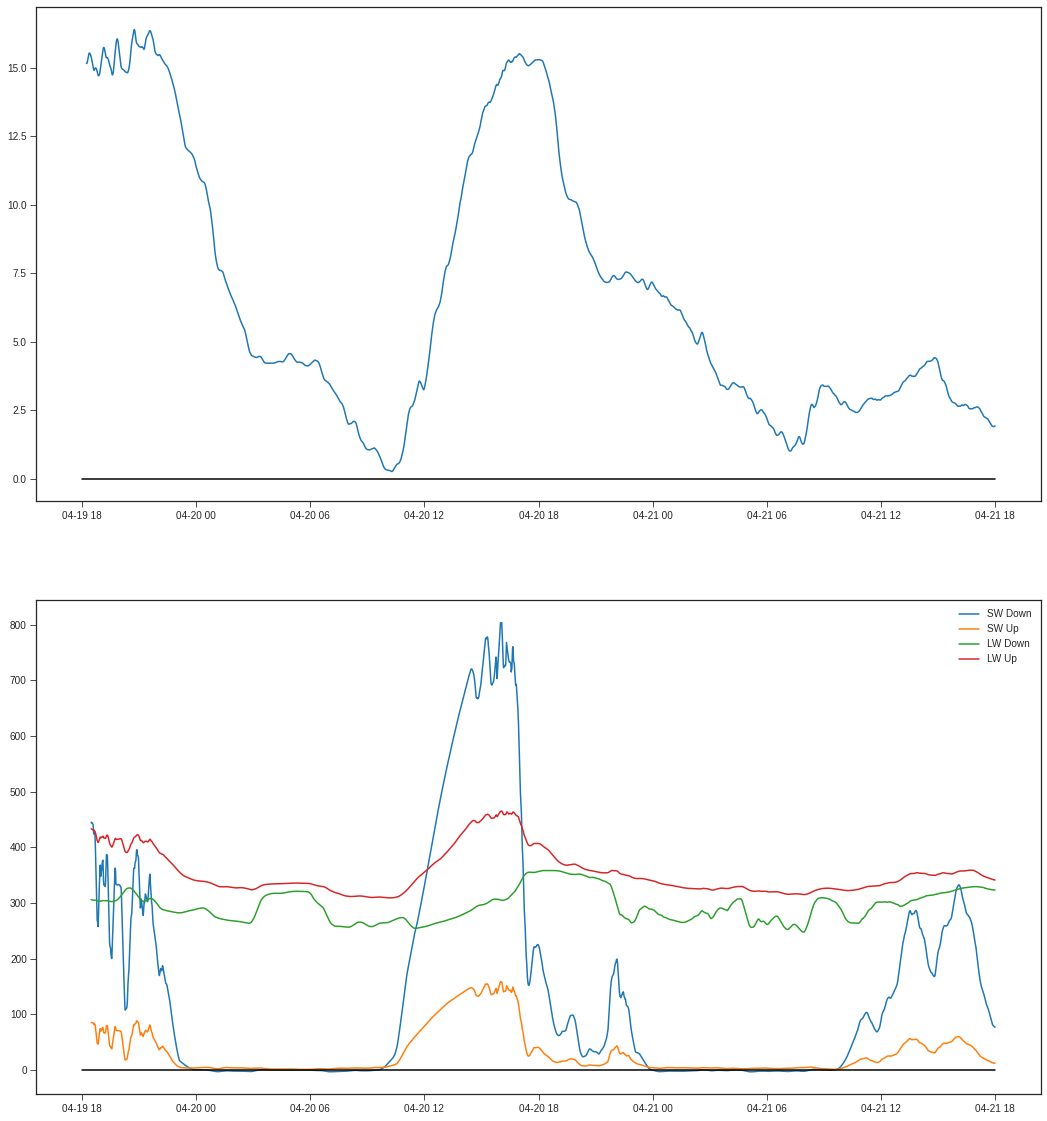

In [9]:
f, axs = plt.subplots(2, 1, figsize=(18, 20))

ax1 = axs[0]
ax1.plot(df_met['Timestamp'], df_met['Air_Temp'].rolling(window=15).mean())
ax1.plot([df_met['Timestamp'].iloc[0],df_met['Timestamp'].iloc[-1]], [0,0], color='k')

ax2 = axs[1]
# df.rolling(window=5).mean()
ax2.plot(df_met['Timestamp'], df_met['SW_Downwelling'].rolling(window=30).mean(), label='SW Down')
ax2.plot(df_met['Timestamp'], df_met['SW_Upwelling'].rolling(window=30).mean(), label='SW Up')
ax2.plot(df_met['Timestamp'], df_met['LW_Downwelling'].rolling(window=30).mean(), label='LW Down')
ax2.plot(df_met['Timestamp'], df_met['LW_Upwelling'].rolling(window=30).mean(), label='LW Up')
#ax2.plot(df_met['Timestamp'], df_met['SW_Downwelling'] - df_met['SW_Upwelling'] + df_met['LW_Downwelling'] - df_met['LW_Upwelling'])
ax2.plot([df_met['Timestamp'].iloc[0],df_met['Timestamp'].iloc[-1]], [0,0], color='k')
ax2.legend()


plt.show()

In [21]:
df_hp

,Timestamp,Precip_rate,Tot_accum,Temp,Baro,RH,Windspeed,Status,Sensor_power,Ref_power
16672,2021-04-19 18:01:00,0.0,20.27,17.08,989.8,34.5,0.1,3,0.0,000.0*55F0
16673,2021-04-19 18:02:00,0.0,20.27,16.89,989.9,33.6,0.1,3,0.0,000.0*E8BC
16674,2021-04-19 18:03:00,0.0,20.27,16.40,989.9,33.0,0.1,3,0.0,000.0*05B2
16675,2021-04-19 18:04:00,0.0,20.27,15.92,989.9,33.3,0.1,3,0.0,000.0*BC18
16676,2021-04-19 18:05:00,0.0,20.27,13.43,0.0,28.2,0.1,3,0.0,000.0*5B79
...,...,...,...,...,...,...,...,...,...,...
18187,2021-04-20 19:16:00,0.0,20.27,5.40,0.0,45.8,0.1,3,0.0,000.0*5FD2
18188,2021-04-20 19:17:00,0.0,20.27,9.58,0.0,84.3,0.1,3,0.0,000.0*412F
18189,2021-04-20 19:18:00,0.0,20.27,5.50,0.0,47.1,0.1,3,0.0,000.0*C510
18190,2021-04-20 19:19:00,0.0,20.27,6.67,0.0,60.8,0.1,3,0.0,000.0*2CFC


In [19]:
df_met

,Timestamp,Air_Temp,Humidity,Dew_Point,Vapour_press_kPa,SW_Downwelling,SW_Upwelling,LW_Downwelling,LW_Upwelling,SW_Net,LW_Net,Albedo,Net_Radiation,IR_1_Temp,IR_2_Temp,Soil_WC,Soil_EC,Soil_Temp,SR50A_SnowDepth,SR50A_QualityVal
27001,2021-04-19 18:01:00,12.538780,29.98,-4.915497,0.424445,916.800200,193.944100,297.9896,470.6936,722.856200,-172.704100,0.211544,550.152100,30.032010,26.286670,0.1721,0.007492,21.073870,0.010752,196.0
27002,2021-04-19 18:02:00,12.783170,29.60,-4.149185,0.449669,790.603000,165.925400,298.7731,465.2219,624.677600,-166.448900,0.209226,458.228600,28.530760,25.247540,0.1721,0.007375,21.386350,0.011378,186.0
27003,2021-04-19 18:03:00,13.090560,28.14,-4.808014,0.427859,335.922400,63.123580,295.1189,425.4913,272.798800,-130.372400,0.184707,142.426400,20.783630,18.759170,0.1721,0.007442,21.395720,0.012162,200.0
27004,2021-04-19 18:04:00,12.672860,27.43,-5.593939,0.403134,267.720000,47.372050,292.3847,408.1051,220.347900,-115.720400,0.174802,104.627500,17.721810,16.561660,0.1721,0.007442,21.082780,0.006194,181.0
27005,2021-04-19 18:05:00,12.282850,27.64,-5.976015,0.391569,442.450100,83.897990,293.0346,413.1288,358.552100,-120.094200,0.183278,238.457900,19.150170,17.334840,0.1721,0.007517,20.766340,0.007525,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,2021-04-21 23:55:00,-2.479136,96.50,-2.960700,0.491393,-0.134442,0.470279,315.5944,315.8454,-0.604721,-0.251010,NaN,-0.855731,0.042067,-0.066967,0.2368,0.009792,0.940125,0.046077,224.0
30236,2021-04-21 23:56:00,-2.552247,96.40,-3.042019,0.488401,-0.136231,0.403298,315.5996,315.8201,-0.539529,-0.220436,NaN,-0.759965,0.027183,-0.070225,0.2368,0.009675,0.931133,0.043026,208.0
30237,2021-04-21 23:57:00,-2.525799,96.30,-3.020180,0.489218,-0.135636,0.416715,315.5814,315.8904,-0.552351,-0.308932,NaN,-0.861283,0.031700,-0.068883,0.2368,0.009683,0.938208,0.038118,196.0
30238,2021-04-21 23:58:00,-2.514835,96.30,-3.008611,0.489655,-0.136091,0.414252,315.5786,315.8559,-0.550342,-0.277275,NaN,-0.827618,0.031667,-0.074483,0.2368,0.009667,0.947200,0.036887,199.0


In [ ]:
# to do:
'''
1) Extract only the time that I need from the df
2) Open the model files and extract the time series for the point of interest for the variables that I can compare.
'''

In [12]:
df_met

,Timestamp,Air_Temp,Humidity,Dew_Point,Vapour_press_kPa,SW_Downwelling,SW_Upwelling,LW_Downwelling,LW_Upwelling,SW_Net,LW_Net,Albedo,Net_Radiation,IR_1_Temp,IR_2_Temp,Soil_WC,Soil_EC,Soil_Temp,SR50A_SnowDepth,SR50A_QualityVal
0,2021-04-01 00:00:00,7.212316,77.80,3.768239,0.799734,0.515146,-1.719078,345.8046,328.3977,2.234224,17.40688,NaN,19.64110,1.281900,3.422975,0.289600,0.007967,5.050900,0.014998,182.0
1,2021-04-01 00:01:00,7.183541,79.59,3.746698,0.798571,0.910544,-1.275812,346.0745,329.5255,2.186356,16.54900,NaN,18.73535,1.529533,4.042017,0.289042,0.008017,5.069141,0.016819,170.0
2,2021-04-01 00:02:00,7.471360,77.80,4.056469,0.816058,1.882261,0.100077,345.8690,329.7721,1.782184,16.09698,0.047295,17.87917,1.536717,4.237833,0.288983,0.008083,5.174425,0.017395,173.0
3,2021-04-01 00:03:00,7.615749,76.52,3.697463,0.795720,1.186359,-0.506098,345.4987,328.6226,1.692457,16.87614,-0.502048,18.56859,1.457150,3.948550,0.289000,0.008000,5.206292,0.011792,179.0
4,2021-04-01 00:04:00,7.407524,78.19,3.729311,0.797555,0.873107,-1.078789,346.0235,328.6372,1.951896,17.38629,NaN,19.33818,1.391292,3.717425,0.289000,0.008083,5.189342,0.013191,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,2021-04-30 23:55:00,2.959731,92.90,1.912606,0.701062,-0.831140,0.940547,329.6248,339.8342,-1.771687,-10.20937,NaN,-11.98106,4.882925,4.768675,0.222192,0.010575,5.846066,0.018878,206.0
43196,2021-04-30 23:56:00,2.991998,92.70,1.922271,0.701554,-0.876696,1.019823,329.5378,339.7195,-1.896519,-10.18169,NaN,-12.07821,4.863525,4.743325,0.222200,0.010450,5.824258,0.018854,206.0
43197,2021-04-30 23:57:00,2.988996,92.40,1.901106,0.700501,-0.937601,1.069014,329.3487,339.6761,-2.006616,-10.32745,NaN,-12.33406,4.853008,4.730691,0.222200,0.010567,5.804492,0.020037,213.0
43198,2021-04-30 23:58:00,3.103389,92.50,2.019628,0.706446,-0.920390,1.076249,329.1568,339.7346,-1.996639,-10.57783,NaN,-12.57447,4.867867,4.740725,0.222200,0.010533,5.783675,0.020148,220.0


In [ ]:
f = '/instruments/SAJESS' 
path = f'{f}/FixedStation/met_tripod/{yr}_{mnth[1]}/raw/'

df_met = pd.read_csv(path + f'Stn_1_met_data_{mnth[0]}{yr}.csv', index_col=0, header=1, skiprows=(2,3), 
                   parse_dates=[0], infer_datetime_format=True, keep_date_col=False)

df_diag = pd.read_csv(path + f'Stn_1_diagnostics_{mnth[0]}{yr}.csv', index_col=0, header=1, skiprows=(2,3), 
                   parse_dates=[0], infer_datetime_format=True, keep_date_col=False)

df_pos = pd.read_csv(path + f'Stn_1_position_{mnth[0]}{yr}.csv', index_col=0, header=1, skiprows=(2,3), 
                   parse_dates=[0], infer_datetime_format=True, keep_date_col=False)

df_met = df_met.astype(float)

df_met.Albedo[df_met.Albedo.abs() > 1] = np.nan

In [6]:
df_met = df_met[~df_met.index.duplicated()]
df_diag = df_diag[~df_diag.index.duplicated()]
df_pos = df_pos[~df_pos.index.duplicated()]

In [7]:
reindxd_met = df_met.reindex(index=ind)
reindxd_met.index.name='Timestamp'
reindxd_diag = df_diag.reindex(index=ind)
reindxd_diag.index.name='Timestamp'
reindxd_pos = df_pos.reindex(index=ind)
reindxd_pos.index.name='Timestamp'

In [8]:
reindxd_met.index[0],reindxd_met.index[-1],reindxd_met.shape

(Timestamp('2021-04-01 00:00:00', freq='T'),
 Timestamp('2021-04-30 23:59:00', freq='T'),
 (43200, 19))